In [1]:
## Parameters

EPOCHS = 150
BS = 16
SIZE = 390 ## Resize factor
TEST_SIZE = 0.1

## 400x400 is default size.

In [2]:
import pandas as pd
import numpy as np
import os
from PIL import Image

pd.options.display.max_columns = 200

In [3]:
labels = "bleach_with_non_chlorine, do_not_bleach, do_not_dryclean, do_not_tumble_dry, do_not_wash, double_bar, dryclean, low_temperature_tumble_dry, normal_temperature_tumble_dry, single_bar, tumble_dry, wash_30, wash_40, wash_60, wash_hand"
labels = labels.split(", ")
labels

['bleach_with_non_chlorine',
 'do_not_bleach',
 'do_not_dryclean',
 'do_not_tumble_dry',
 'do_not_wash',
 'double_bar',
 'dryclean',
 'low_temperature_tumble_dry',
 'normal_temperature_tumble_dry',
 'single_bar',
 'tumble_dry',
 'wash_30',
 'wash_40',
 'wash_60',
 'wash_hand']

In [4]:
train_csv = pd.read_csv("train_target.csv")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()


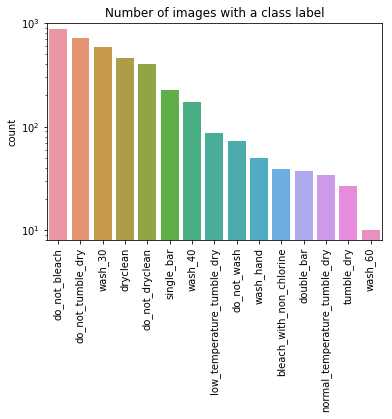

In [5]:
from collections import Counter
import seaborn as sns

## Distribution of care symbols in 936 images.

df = train_csv[train_csv.PredictedOutcome != 0]
all_labels = [lbs for lbs in df['CareSymbolTag']]
labels_count = Counter(all_labels)
ax = sns.countplot(all_labels, order=[k for k, _ in labels_count.most_common()], log=True)
ax.set_title('Number of images with a class label')
ax.set_ylim(0, 1E3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [6]:
total_count = sum(labels_count.values())
class_weights = {cls: total_count / count for cls, count in labels_count.items()}

In [7]:
## Class weights of fifteen categories.

class_weights

{'bleach_with_non_chlorine': 97.51282051282051,
 'do_not_bleach': 4.306908267270668,
 'do_not_dryclean': 9.413366336633663,
 'do_not_tumble_dry': 5.31145251396648,
 'do_not_wash': 52.81944444444444,
 'double_bar': 102.78378378378379,
 'dryclean': 8.231601731601732,
 'low_temperature_tumble_dry': 44.22093023255814,
 'normal_temperature_tumble_dry': 111.8529411764706,
 'single_bar': 16.67982456140351,
 'tumble_dry': 140.85185185185185,
 'wash_30': 6.523156089193825,
 'wash_40': 22.11046511627907,
 'wash_60': 380.3,
 'wash_hand': 76.06}

In [8]:
import cv2

pics = ["train_set_1/"+i for i in os.listdir("train_set_1/")]

df_feature=[]
names = []

for pic in pics:
    name = pic.split("/")[-1].split(".")[0]
    names.append(name)
    img = cv2.imread(pic)
    resized = cv2.resize(img,(SIZE,SIZE))
    df_feature.append(resized)

In [9]:
"""pics = ["train_set_2/"+i for i in os.listdir("train_set_2/")]

for pic in pics:
    name = pic.split("/")[-1].split(".")[0]
    names.append(name)
    img = cv2.imread(pic)
    resized = cv2.resize(img,(SIZE,SIZE))
    df_feature.append(resized)"""

'pics = ["train_set_2/"+i for i in os.listdir("train_set_2/")]\n\nfor pic in pics:\n    name = pic.split("/")[-1].split(".")[0]\n    names.append(name)\n    img = cv2.imread(pic)\n    resized = cv2.resize(img,(SIZE,SIZE))\n    df_feature.append(resized)'

In [10]:
pics=["train_set_3/"+i for i in os.listdir("train_set_3/")]

for pic in pics:
    name = pic.split("/")[-1].split(".")[0]
    names.append(name)
    img = cv2.imread(pic)
    resized = cv2.resize(img,(SIZE,SIZE))
    df_feature.append(resized)

In [11]:
df_feature = np.array(df_feature)

In [12]:
df_feature.shape

(1872, 390, 390, 3)

In [13]:
train_csv.head(3)

,Id,ImageName,CareSymbolTag,PredictedOutcome
0,1,train_1,bleach_with_non_chlorine,0
1,2,train_1,do_not_bleach,1
2,3,train_1,do_not_dryclean,0


In [14]:
df_label = pd.pivot_table(train_csv, values='PredictedOutcome', index=["ImageName"],
                    columns=['CareSymbolTag'])

df_label.columns.name = None
df_label = df_label.reset_index()

df_label["idx"] = df_label["ImageName"].apply(lambda x: x.split("_")[1])

df_label.index = df_label.idx

del df_label["idx"]

df_label.head()

,ImageName,bleach_with_non_chlorine,do_not_bleach,do_not_dryclean,do_not_tumble_dry,do_not_wash,double_bar,dryclean,low_temperature_tumble_dry,normal_temperature_tumble_dry,single_bar,tumble_dry,wash_30,wash_40,wash_60,wash_hand
idx,,,,,,,,,,,,,,,,
1,train_1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0
10,train_10,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
100,train_100,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0
101,train_101,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
102,train_102,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0


In [15]:
df_label = df_label.set_index(df_label.ImageName)
df_label = df_label.loc[names]
del df_label["ImageName"]

In [16]:
df_show = df_label.copy()

In [17]:
df_label.shape

(1872, 15)

In [18]:
df_feature.shape

(1872, 390, 390, 3)

In [19]:
df_label = df_label.values

In [20]:
from keras import backend as K
import keras
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,Activation,Flatten,Dropout,Cropping2D,Lambda,GlobalAveragePooling2D,BatchNormalization,AveragePooling2D
from keras.models import Sequential,Model
from keras.optimizers import SGD,rmsprop
import tensorflow as tf
from tensorflow.python.ops import array_ops

## Loss functions

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def hn_multilabel_loss(y_true, y_pred):
    # Avoid divide by 0
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    # Multi-task loss
    return K.mean(K.sum(- y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred), axis=1))

Using TensorFlow backend.


## **Best Model: DenseNet121**

In [22]:
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.metrics import (categorical_accuracy, categorical_crossentropy,
                           top_k_categorical_accuracy)
from keras.optimizers import Adam, SGD


def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

In [23]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss

df_feature = preprocess_input(df_feature) ## Rescaling w.r.t. 'imagenet' dataset.

x_train, x_test, y_train, y_test = train_test_split(df_feature, df_label, test_size=TEST_SIZE)

callbacks = [
            EarlyStopping(patience=15, verbose=1),
            ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1)
            ]

In [24]:
## Pretraining with imagenet weights

base_model = DenseNet121(include_top=False, weights='imagenet',
                         input_shape=(SIZE, SIZE, 3), classes=15)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(.2)(x)

predictions = Dense(15, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

## Freeze network except last three layers:

for layer in model.layers:  
    layer.trainable = False

for i in range(-3,0):
    model.layers[i].trainable = True

model.compile(optimizer=Adam(lr=1e-4, decay=1e-9), loss=hn_multilabel_loss, metrics=['binary_crossentropy',
              categorical_crossentropy, categorical_accuracy, top_3_accuracy])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
from keras.preprocessing.image import ImageDataGenerator

# Construct the training image generator for data augmentation

aug = ImageDataGenerator(rotation_range = 40,
        width_shift_range = 0.15,
        height_shift_range = 0.15,
        shear_range = 0.15,
        zoom_range = 0.2,  
        horizontal_flip = True,
        vertical_flip = False,
        fill_mode ='nearest')
        
aug_val = ImageDataGenerator()

# Train the network

H = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),
                        validation_data = aug_val.flow(x_test, y_test, batch_size=BS) , 
                        validation_steps = (len(df_feature)//TEST_SIZE )// BS,
                        callbacks = callbacks, 
                        steps_per_epoch = len(df_feature) // BS,
                        epochs = 5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
117/117 [==============================] - 182s 2s/step - loss: 5.7556 - binary_crossentropy: 0.3837 - categorical_crossentropy: 8.9626 - categorical_accuracy: 0.8819 - top_3_accuracy: 0.9322 - val_loss: 5.6127 - val_binary_crossentropy: 0.3742 - val_categorical_crossentropy: 8.9181 - val_categorical_accuracy: 0.9044 - val_top_3_accuracy: 0.9363
Epoch 2/5
117/117 [==============================] - 173s 1s/step - loss: 5.1974 - binary_crossentropy: 0.3465 - categorical_crossentropy: 8.6953 - categorical_accuracy: 0.9226 - top_3_accuracy: 0.9509 - val_loss: 5.4672 - val_binary_crossentropy: 0.3645 - val_categorical_crossentropy: 8.8346 - val_categorical_accuracy: 0.8826 - val_top_3_accuracy: 0.9360
Epoch 3/5
117/117 [==============================] - 173s 1s/step - loss: 5.0389 - binary_crossentropy: 0.3359 - categorical_crossentropy: 8.5215 - categorical_accuracy: 0.9183 - top_3_accuracy: 0.9498 - val_loss: 5.4571 - val_binary_cr

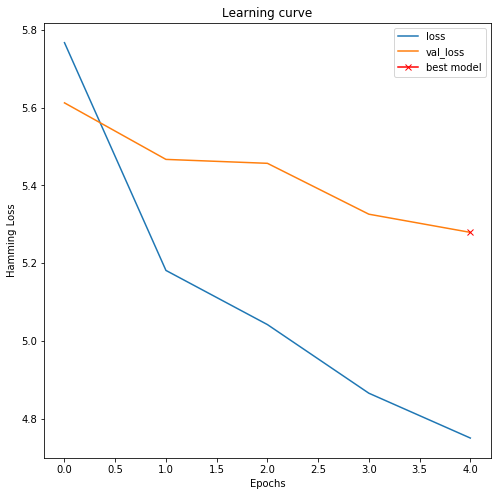

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(H.history["loss"], label="loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot( np.argmin(H.history["val_loss"]), np.min(H.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Hamming Loss")
plt.legend()

In [27]:
out = model.predict(x_test)
y_pred1 = (out > 0.5) 
hamming_loss(y_test,y_pred1)

0.15425531914893617

In [28]:
## Save pretraining model.

model.save_weights('model_PRE.h5')
del model

In [29]:
## Training & fine-tuning without imagenet weights

base_model = DenseNet121(include_top=False, weights=None,
                         input_shape=(SIZE, SIZE, 3), classes=15)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(15, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.load_weights('model_PRE.h5')

for layer in model.layers:
    layer.trainable = True

model.compile(optimizer=Adam(lr=1e-4, decay=1e-9), loss=hn_multilabel_loss, metrics=['binary_crossentropy',
              categorical_crossentropy, categorical_accuracy, top_3_accuracy])

In [30]:
# Construct the training image generator for data augmentation
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=40,
        width_shift_range = 0.15,
        height_shift_range = 0.15,
        shear_range = 0.15,
        zoom_range = 0.2,  
        horizontal_flip = True,
        vertical_flip = False,
        fill_mode='nearest')
     
aug_val = ImageDataGenerator()

# Train the network

H = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),
                        validation_data = aug_val.flow(x_test, y_test, batch_size=BS) , 
                        validation_steps = (len(df_feature)//TEST_SIZE )// BS,
                        callbacks = callbacks, 
                        steps_per_epoch=len(df_feature) // BS,
                        epochs=EPOCHS)   

Epoch 1/150
117/117 [==============================] - 210s 2s/step - loss: 4.1685 - binary_crossentropy: 0.2779 - categorical_crossentropy: 8.0845 - categorical_accuracy: 0.7201 - top_3_accuracy: 0.9476 - val_loss: 3.3635 - val_binary_crossentropy: 0.2242 - val_categorical_crossentropy: 7.6673 - val_categorical_accuracy: 0.7712 - val_top_3_accuracy: 0.9521
Epoch 2/150
117/117 [==============================] - 179s 2s/step - loss: 3.2492 - binary_crossentropy: 0.2166 - categorical_crossentropy: 7.5337 - categorical_accuracy: 0.6261 - top_3_accuracy: 0.9466 - val_loss: 2.8765 - val_binary_crossentropy: 0.1918 - val_categorical_crossentropy: 7.3517 - val_categorical_accuracy: 0.6540 - val_top_3_accuracy: 0.9576
Epoch 3/150
117/117 [==============================] - 177s 2s/step - loss: 2.6858 - binary_crossentropy: 0.1791 - categorical_crossentropy: 7.2515 - categorical_accuracy: 0.5534 - top_3_accuracy: 0.9498 - val_loss: 2.4059 - val_binary_crossentropy: 0.1604 - val_categorical_cross

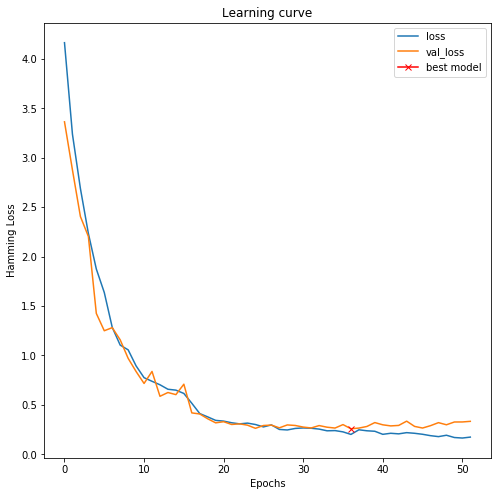

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(H.history["loss"], label="loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot( np.argmin(H.history["val_loss"]), np.min(H.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Hamming Loss")
plt.legend()

In [32]:
out = model.predict(x_test)

In [33]:
y_pred1 = (out > 0.5) 
hamming_loss(y_test,y_pred1)

0.008865248226950355

In [34]:
out = model.predict(x_test)
y_pred1 = (out > 0.48) 
hamming_loss(y_test,y_pred1)

0.008865248226950355

In [35]:
import json

## Save weights & model structure:

model.save_weights('model.h5')

model_json = model.to_json()
with open("model_in_json.json", "w") as json_file:
    json.dump(model_json, json_file)

In [36]:
from keras.models import load_model
from keras.models import model_from_json
import json

## Reload weights & model structure:

with open('model_in_json.json','r') as f:
    model_json = json.load(f)

model = model_from_json(model_json)
model.load_weights('model.h5')


## **Submission**

In [57]:
import cv2

pics = ["test_set_equalized/"+i for i in os.listdir("test_set_equalized")]
df_test_features = []
names=[]

for pic in pics:
    
    try:
        img = cv2.imread(pic)
        resized = cv2.resize(img,(SIZE,SIZE))
        name = pic.split("/")[-1].split(".")[0]
        names.append(name)
        df_test_features.append(resized)
    except:
        pass
    

In [ ]:
"""pics=["test_set_equalized/"+i for i in os.listdir("test_set_equalized")]

for pic in pics:
    name = pic.split("/")[-1].split(".")[0]
    names.append(name)
    img = cv2.imread(pic)
    resized = cv2.resize(img,(SIZE,SIZE))
    df_test_features.append(resized)"""

In [ ]:
"""pics=["test_set_gammacorrected/"+i for i in os.listdir("test_set_gammacorrected")]

for pic in pics:
    name = pic.split("/")[-1].split(".")[0]
    names.append(name)
    img = cv2.imread(pic)
    resized = cv2.resize(img,(SIZE,SIZE))
    df_test_features.append(resized)"""

In [58]:
len(df_test_features)

403

In [59]:
df_test_features = np.array(df_test_features)
df_test_features = preprocess_input(df_test_features)

In [60]:
pred = model.predict(df_test_features)

In [61]:
y_pred1 = (pred > 0.5)

In [62]:
preds = pd.DataFrame(y_pred1)
preds.columns = labels
preds.shape

(403, 15)

In [63]:
preds["ImageID"] = names
preds = pd.melt(preds,id_vars=['ImageID'], value_vars=labels)
preds["num"] = preds["ImageID"].apply(lambda x: x.split("_")[1])
preds["num"] = preds["num"].astype(int)
preds.head()

,ImageID,variable,value,num
0,test_112,bleach_with_non_chlorine,False,112
1,test_74,bleach_with_non_chlorine,False,74
2,test_340,bleach_with_non_chlorine,False,340
3,test_255,bleach_with_non_chlorine,False,255
4,test_192,bleach_with_non_chlorine,False,192


In [64]:
preds = preds.sort_values(by=["num","variable"])
del preds["num"]

preds.value = preds.value.astype(int)

preds.head(5)

,ImageID,variable,value
237,test_1,bleach_with_non_chlorine,0
640,test_1,do_not_bleach,1
1043,test_1,do_not_dryclean,1
1446,test_1,do_not_tumble_dry,1
1849,test_1,do_not_wash,0


In [65]:
preds = preds.reset_index(drop=True)
preds.index +=1
preds.columns = ["ImageName","CareSymbolTag","PredictedOutcome"]
preds.index.name = 'Id'
preds.head(5)

,ImageName,CareSymbolTag,PredictedOutcome
Id,,,
1,test_1,bleach_with_non_chlorine,0
2,test_1,do_not_bleach,1
3,test_1,do_not_dryclean,1
4,test_1,do_not_tumble_dry,1
5,test_1,do_not_wash,0


In [66]:
pred_label = pd.pivot_table(preds, values='PredictedOutcome', index=["ImageName"],
                    columns=['CareSymbolTag'])

pred_label.columns.name = None
pred_label = pred_label.reset_index()
pred_label["idx"] = pred_label["ImageName"].apply(lambda x: x.split("_")[1])
pred_label.index = pred_label.idx

del pred_label["idx"]

pred_label.head()
pred_label = pred_label.set_index(pred_label.ImageName)
pred_label = pred_label.loc[names]

del pred_label["ImageName"]

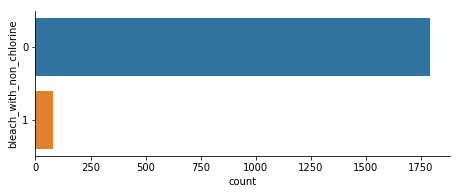

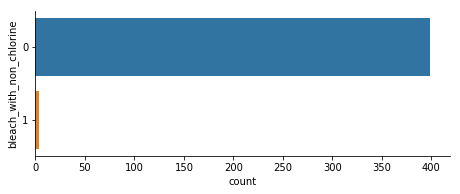

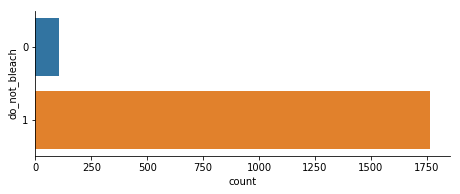

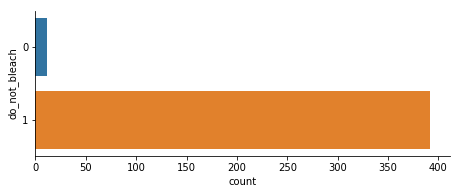

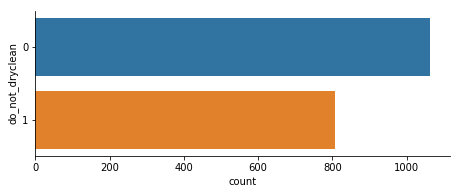

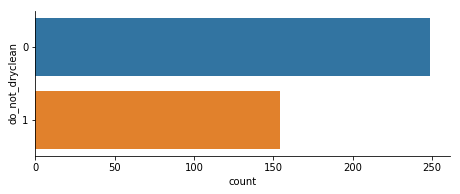

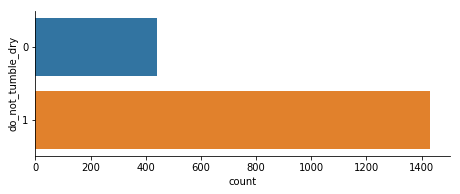

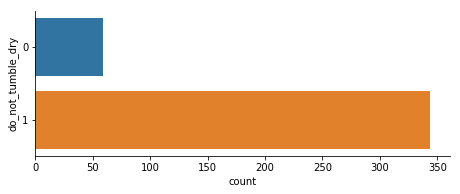

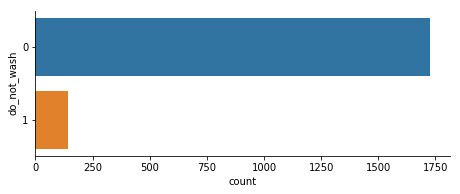

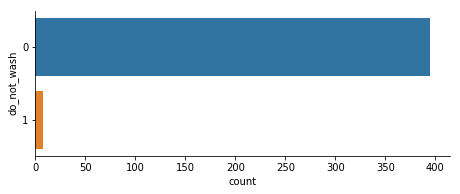

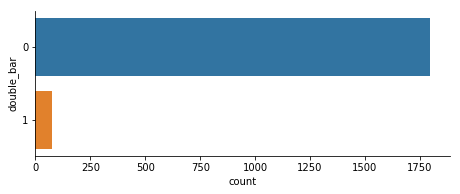

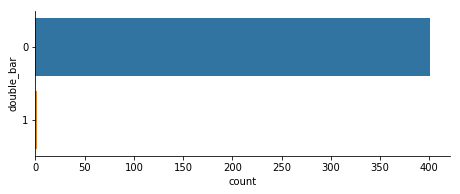

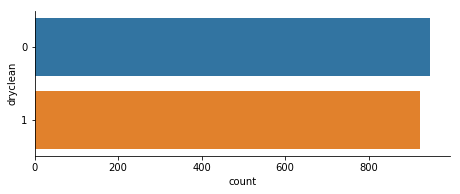

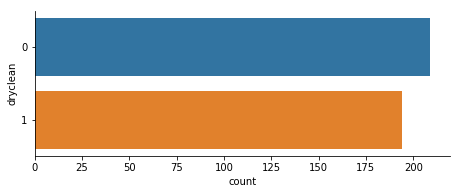

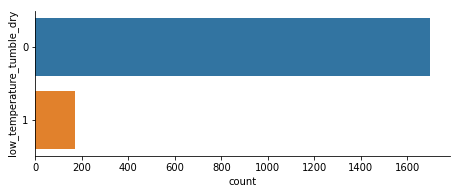

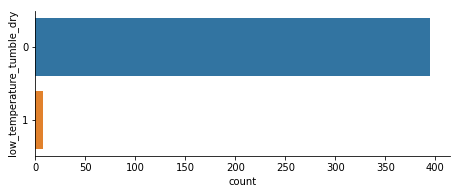

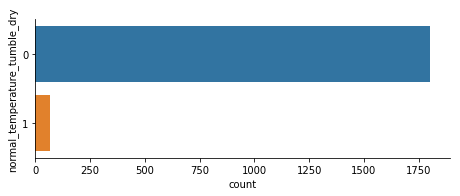

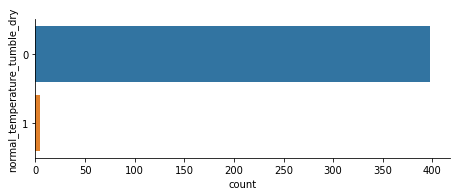

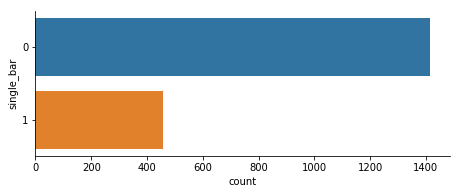

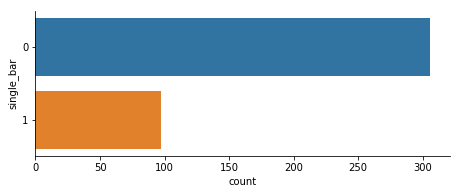

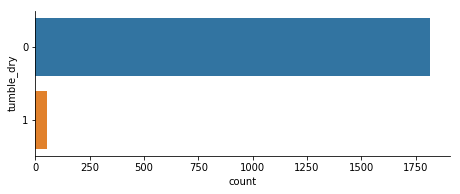

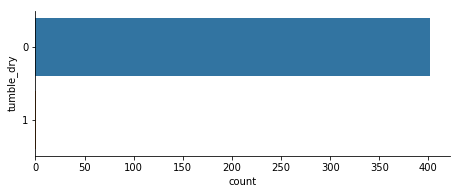

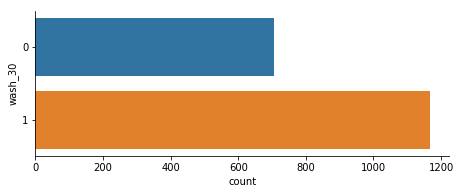

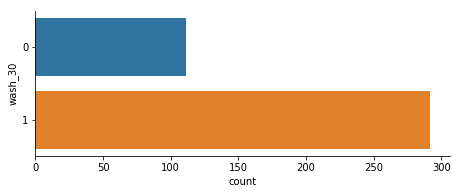

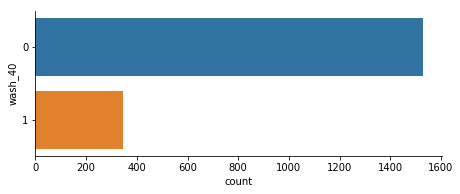

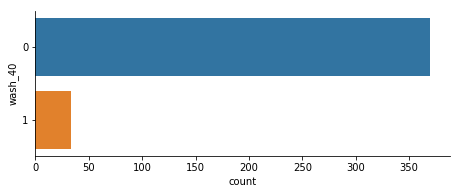

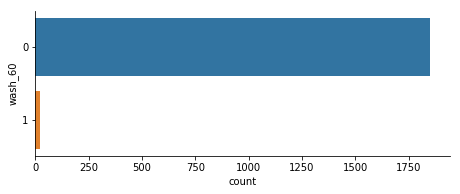

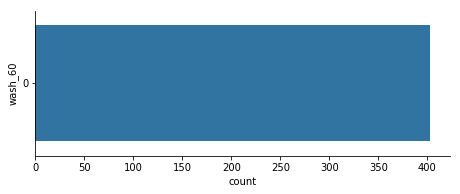

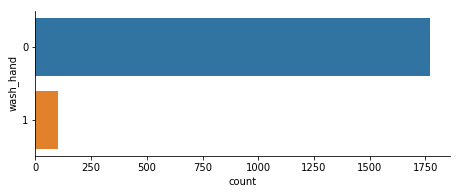

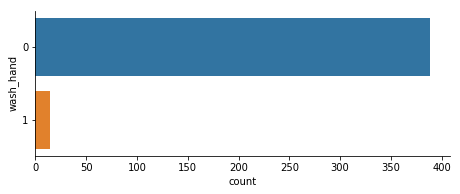

In [67]:
import seaborn as sns

## Plot distribution of classes in training and predicted test set:

for label in labels:
  ax = sns.catplot(y=label, kind="count", data = df_show, height=2.6, aspect=2.5, orient='h')
  ay = sns.catplot(y=label, kind="count", data = pred_label, height=2.6, aspect=2.5, orient='h')

In [68]:
preds.tail(10)

,ImageName,CareSymbolTag,PredictedOutcome
Id,,,
6036,test_403,double_bar,0
6037,test_403,dryclean,0
6038,test_403,low_temperature_tumble_dry,0
6039,test_403,normal_temperature_tumble_dry,0
6040,test_403,single_bar,0
6041,test_403,tumble_dry,0
6042,test_403,wash_30,0
6043,test_403,wash_40,0
6044,test_403,wash_60,0


In [69]:
preds.shape

(6045, 3)

In [70]:
preds.to_csv("submission.csv")